C:\Users\HP\AppData\Local\Temp\ipykernel_3216\1417732746.py:127: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


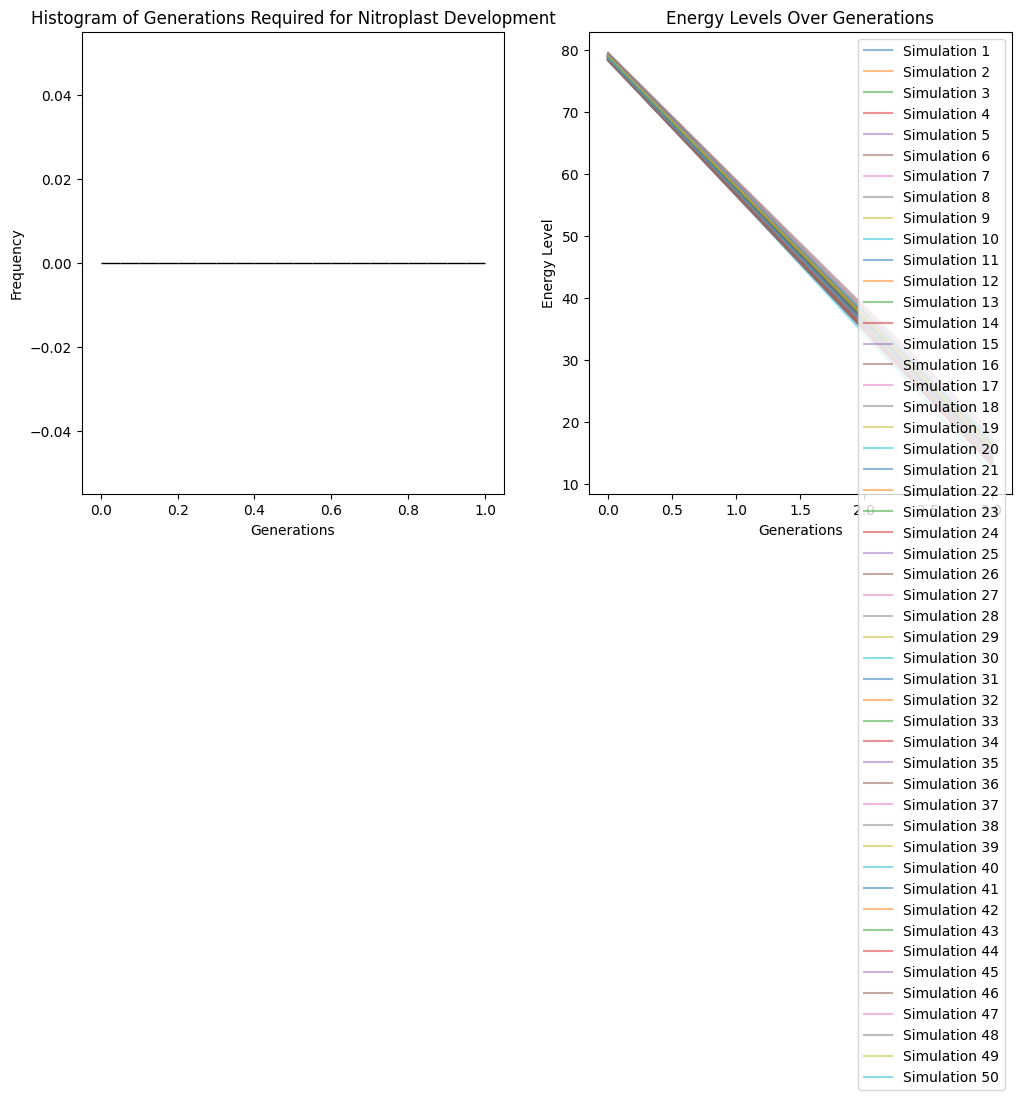

Average Generations Required for Nitroplast Development: nan


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class CellularComponent:
    def __init__(self, function_efficiency, mutation_rate):
        self.function_efficiency = function_efficiency
        self.mutation_rate = mutation_rate

    def mutate(self):
        if np.random.rand() < self.mutation_rate:
            mutation_effect = np.random.uniform(-0.1, 0.1)
            self.function_efficiency = max(0, min(1, self.function_efficiency + mutation_effect))

class EukaryoticSymbiont:
    def __init__(self, genome_length, component_count):
        self.genome = np.random.randint(0, 2, genome_length)
        self.components = {
            'mitochondria': CellularComponent(function_efficiency=0.8, mutation_rate=0.01),
            'ribosome': CellularComponent(function_efficiency=0.7, mutation_rate=0.01),
            'chloroplast': CellularComponent(function_efficiency=0.6, mutation_rate=0.01),
            'nitroplast': CellularComponent(function_efficiency=0.1, mutation_rate=0.01)
        }
        self.component_count = component_count
        self.energy_level = 100  # Start with a base energy level

    def mutate(self):
        mutation_mask = np.random.rand(len(self.genome)) < 0.01
        self.genome = np.where(mutation_mask, 1 - self.genome, self.genome)
        for component in self.components.values():
            component.mutate()

    def metabolic_process(self, environment):
        # Energy production based on function efficiencies of organelles
        energy_production = (self.components['mitochondria'].function_efficiency * environment['nutrients'] +
                             self.components['chloroplast'].function_efficiency * environment['light'])
        energy_consumption = sum(comp.function_efficiency for comp in self.components.values()) * 10  # Energy consumed by organelles
        
        self.energy_level += energy_production - energy_consumption
        if self.energy_level <= 0:
            return False  # Cell dies if energy is depleted
        return True

    def evolve_nitroplast(self):
        if self.components['nitroplast'].function_efficiency > 0.95:
            self.components['nitroplast'].function_efficiency = 1.0
            return True  # Nitroplast fully developed
        return False

class ProkaryoticHost:
    def __init__(self, genome_length):
        self.genome = np.random.randint(0, 2, genome_length)
        self.stability = 0.9
        self.nutrient_richness = 0.8

    def mutate(self):
        mutation_mask = np.random.rand(len(self.genome)) < 0.01
        self.genome = np.where(mutation_mask, 1 - self.genome, self.genome)

class Environment:
    def __init__(self):
        self.temperature = np.random.uniform(0, 1)
        self.pH = np.random.uniform(0, 1)
        self.toxins = np.random.uniform(0, 1)
        self.nutrients = np.random.uniform(0, 1)
        self.light = np.random.uniform(0, 1)

    def fluctuate(self):
        self.temperature += np.random.uniform(-0.05, 0.05)
        self.pH += np.random.uniform(-0.05, 0.05)
        self.toxins += np.random.uniform(-0.05, 0.05)
        self.nutrients += np.random.uniform(-0.05, 0.05)
        self.light += np.random.uniform(-0.05, 0.05)
        self.temperature = np.clip(self.temperature, 0, 1)
        self.pH = np.clip(self.pH, 0, 1)
        self.toxins = np.clip(self.toxins, 0, 1)
        self.nutrients = np.clip(self.nutrients, 0, 1)
        self.light = np.clip(self.light, 0, 1)

def simulate_symbiosis(generations=5000):
    environment = Environment()
    host = ProkaryoticHost(genome_length=100)
    symbiont = EukaryoticSymbiont(genome_length=100, component_count=4)

    nitroplast_development_time = None
    energy_levels_over_time = []
    for generation in range(generations):
        environment.fluctuate()
        host.mutate()
        symbiont.mutate()
        
        if not symbiont.metabolic_process(vars(environment)):
            break  # Symbiont dies if energy is depleted
        
        energy_levels_over_time.append(symbiont.energy_level)
        
        if symbiont.evolve_nitroplast():
            nitroplast_development_time = generation
            break

    return nitroplast_development_time, energy_levels_over_time

# Run the complex simulation
development_times = []
energy_levels = []
for _ in range(50):
    development_time, energy_level = simulate_symbiosis(generations=10000)
    development_times.append(development_time)
    energy_levels.append(energy_level)

# Plotting results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist([t for t in development_times if t is not None], bins=20, edgecolor='black')
plt.title('Histogram of Generations Required for Nitroplast Development')
plt.xlabel('Generations')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
for i, energy_level in enumerate(energy_levels):
    plt.plot(energy_level, label=f'Simulation {i+1}', alpha=0.5)
plt.title('Energy Levels Over Generations')
plt.xlabel('Generations')
plt.ylabel('Energy Level')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

avg_development_time = np.mean([t for t in development_times if t is not None])
print(f"Average Generations Required for Nitroplast Development: {avg_development_time:.2f}")
